# Data science and Business Analytics Internship

Linear Regression with Python Scikit learn - prediction using Supervised ML

# Task 1: Predict the percentage of an student based on the no. of study hours

Simple Linear Regression




In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.



# Author : Rishi Patel

# Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Read The Data From the Given Sources 


In [2]:
df= pd.read_csv("http://bit.ly/w-data")

In [3]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
df.isnull() == True

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


No Any null data in given Data, So we can Go further..

In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Data Visualization

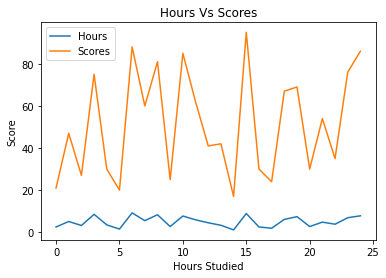

In [10]:

#visualization with line plot

df.plot(kind='line')
plt.title("Hours Vs Scores")
plt.xlabel("Hours Studied")
plt.ylabel("Score")
plt.show()

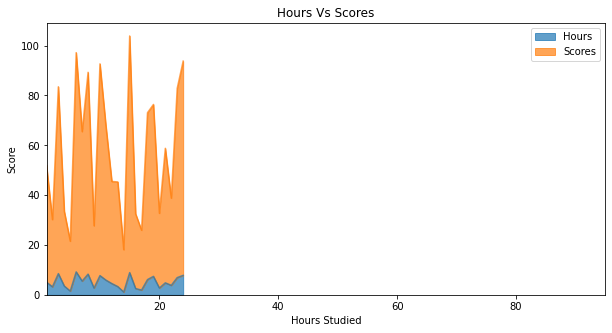

In [11]:
#visualization with area plot

xmin = min(df.Hours)
xmax = max(df.Scores)
df.plot(kind = "area", alpha = 0.7, stacked = True, figsize= (10,5), xlim = (xmin, xmax))
plt.title("Hours Vs Scores")
plt.xlabel("Hours Studied")
plt.ylabel("Score")
plt.show()

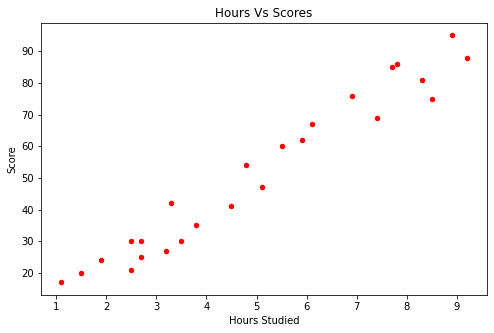

In [12]:
#vvisualization with scatter plot

df.plot(kind = "scatter", x='Hours', y='Scores', color = 'r', figsize= (8,5))
plt.title("Hours Vs Scores")
plt.xlabel("Hours Studied")
plt.ylabel("Score")
plt.show()

By visvisualization  we  come to know that this problem can be easily solved by linear regression

# Modeling the data

In [13]:
x = np.array(df[['Hours']])
y = np.array(df['Scores'])

train_x,  test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=2)

reg = LinearRegression()
reg.fit(train_x, train_y)

print("regression coefficient : ",reg.coef_)
print("regression intercept: ",reg.intercept_)

print("Training done")

regression coefficient :  [9.94061514]
regression intercept:  1.5079104828268939
Training done


We can also plot the fir line over the data in single Linear regression.

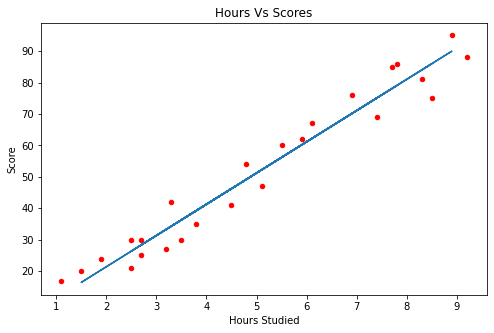

In [15]:
df.plot(kind = "scatter", x='Hours', y='Scores', color = 'r', figsize= (8,5))

#  Y = Mx + C (Apply below)
plt.plot(train_x,  reg.coef_*train_x + reg.intercept_)
plt.title("Hours Vs Scores")
plt.xlabel("Hours Studied")
plt.ylabel("Score")
plt.show()

Absolute Error and r2 to see accuracy

In [16]:
from sklearn import metrics
from sklearn.metrics import r2_score


predict_y = reg.predict(test_x)
print("predicted values : ",predict_y)
print("absolute error : ",metrics.mean_absolute_error(predict_y, test_y))
print("r2 score : ",r2_score(predict_y, test_y))


predicted values :  [12.44258714 26.35944834 20.39507925 92.9615698  70.09815497]
absolute error :  4.877039354964476
r2 score :  0.9753240760240944


Different between Actual and predicted value

In [17]:
data2 = pd.DataFrame({'Actual' : test_y, 'Predict': predict_y})
data2


,Actual,Predict
0,17,12.442587
1,21,26.359448
2,24,20.395079
3,88,92.961570
4,76,70.098155


In [18]:
#At given 9.25 hour 

predicted_score = reg.predict([[9.25]])

print("Predicted Score : ", predicted_score)

Predicted Score :  [93.45860056]
